# --------------------------------
# Instalação e importação de Dependências
# --------------------------------

In [1]:
import keras
import os
import gdown
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import backend as K
from keras import regularizers
from keras.callbacks import TensorBoard

In [10]:
os.getcwd()

'c:\\Users\\jpsfb\\OneDrive\\Área de Trabalho\\LINSE\\Códigos'

In [19]:
# Coloquei uma pasta como visível (não editável) publicamente e peguei o link, da onde tirei a id usada no comando abaixo.
# O link é o seguinte: https://drive.google.com/drive/folders/1RaGjPb2wRcT1clvTqA-FdtkLJv_N-518
dados = gdown.download_folder(id="1RaGjPb2wRcT1clvTqA-FdtkLJv_N-518")



Retrieving folder contents


Processing file 1efGMAZYypEiaQU8Zks05mj8g-fJY5OyX R1_A1_0.1.feather
Processing file 14L9uNfd19PzP-Vh4CeD7AexmbvQz1u_O R1_A1_0.5.feather
Processing file 1fyOEvRJlMPWsAgyE1I2GJp6jEgBTaEPC R1_A1_0.25.feather
Processing file 1A2eGN3Wd1UG5CDunUKAUToaoQ7nA7BGB R1_A1_1.0.feather
Processing file 138ynRoO-wsv3iMlw3k5_W93wVbCwn66i R2_A1_0.1.feather
Processing file 1cuQPOCD-ikDnkITEXuhFcapRz3WjM7ms R2_A1_0.5.feather
Processing file 1ActxF2BNWxJeB7rdPKqaKpIvUwJWLEsO R2_A1_0.25.feather
Processing file 1eMW9E8fMcvz8wmq49xSXKcJg36R-D56K R2_A1_1.0.feather
Processing file 1whnYFkQ2pqz0KUKBFALTjRz4gggVLThh R3_A1_0.1.feather
Processing file 177GBUzd_t-sOn0b5WIgunNQdp5wDa-Ot R3_A1_0.5.feather
Processing file 1NXZ7RXa0rPfFM5Sshu_fMh_Zz2TQaDIs R3_A1_0.25.feather
Processing file 13gYMUFQYfI-YLF7GOu9CtXPoyHhfHasR R3_A1_1.0.feather


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1efGMAZYypEiaQU8Zks05mj8g-fJY5OyX
To: c:\Users\jpsfb\OneDrive\Área de Trabalho\LINSE\Códigos\06Maio2024-Atuador1-Exp1-VigaIntacta\R1_A1_0.1.feather
100%|██████████| 1.91M/1.91M [00:11<00:00, 162kB/s]
c:\Users\jpsfb\miniconda3\envs\myenv\Lib\site-packages\gdown\download.py:32: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(line, features="html.parser")


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=14L9uNfd19PzP-Vh4CeD7AexmbvQz1u_O

but Gdown can't. Please check connections and permissions.

# -----------------------
# 1 - Simplest autoencoder
# -----------------------

In [13]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_data = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_data, decoded)

In [14]:
# This model maps an input to its encoded representation

encoder = keras.Model(input_data, encoded)

In [15]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [16]:
#configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
(x_train, _), (x_test, _) = dados

TypeError: cannot unpack non-iterable builtin_function_or_method object

In [34]:
#normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [35]:
#train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2901 - val_loss: 0.2023
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1786 - val_loss: 0.1601
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1522 - val_loss: 0.1430
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1386 - val_loss: 0.1320
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1292 - val_loss: 0.1241
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1224 - val_loss: 0.1182
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1174 - val_loss: 0.1141
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1137 - val_loss: 0.1109
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1112 - val_loss: 0.1089
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1094 - val_loss: 0.1074

- After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [36]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 840us/step


# ----------------------
# 1.1 - Usando Matplotlib
# ----------------------

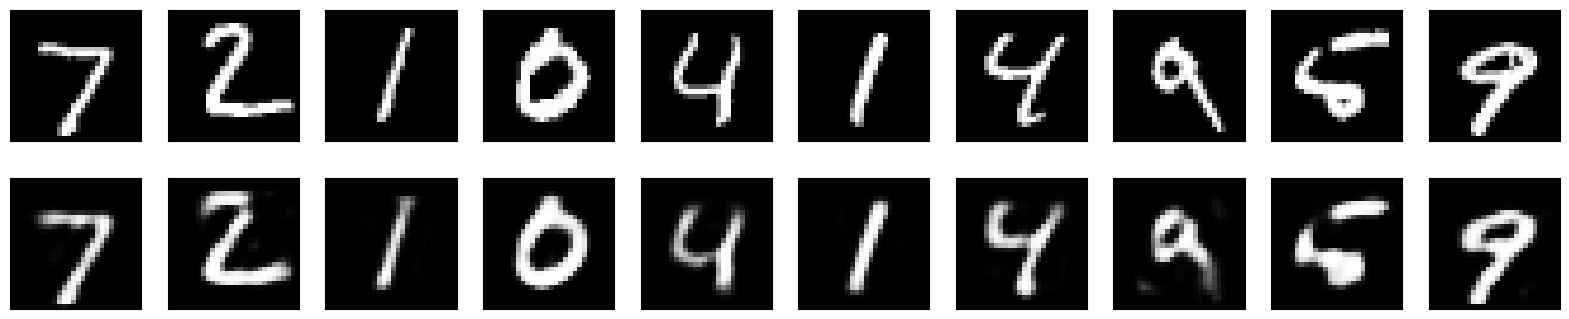

In [37]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# -------------------------------------------
# 2 - Adding a sparsity constraint on the encoded representations
# -------------------------------------------

In [38]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Parei em (https://blog.keras.io/building-autoencoders-in-keras.html)

# ----------------------------
# 2.1 - Deep autoenconder
# ----------------------------

In [39]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [40]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2480 - val_loss: 0.1678
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1526 - val_loss: 0.1379
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1335 - val_loss: 0.1277
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1258 - val_loss: 0.1223
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1211 - val_loss: 0.1175
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1167 - val_loss: 0.1130
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1122 - val_loss: 0.1090
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1088 - val_loss: 0.1063
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1063 - val_loss: 0.1041
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1044 - val_lo

# ----------------------
# 2.2 - Usando Matplotlib
# ----------------------

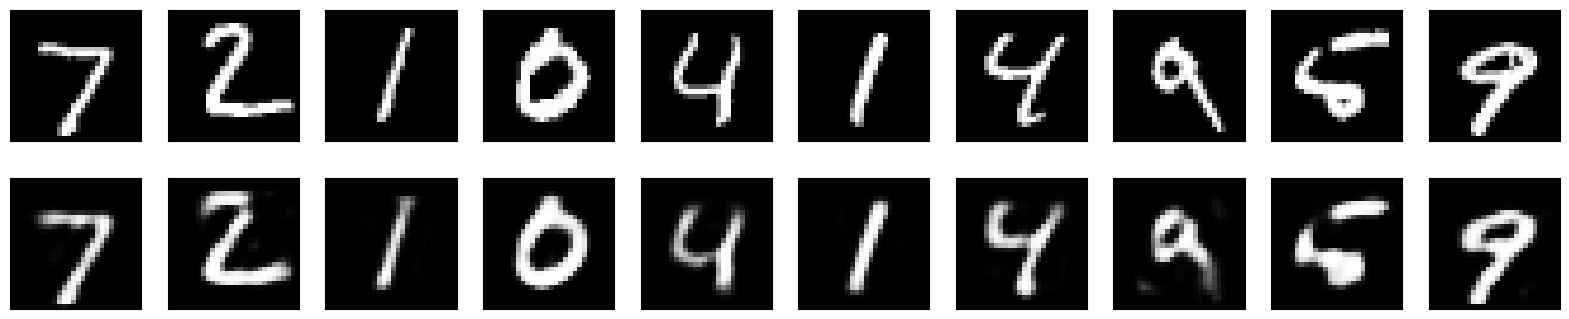

In [41]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# --------------------------------
# 3 - Convolutional autoenconder
# --------------------------------

In [42]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [43]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Abrir terminal e rodar o código abaixo

In [ ]:
tensorboard --logdir=/tmp/autoencoder

# para visualizar resultados do modelo durante o treinamento
# copiar path que o CMD retorna e colar no browser para visualizar

In [47]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 8s 15ms/step - loss: 0.2059 - val_loss: 0.1478
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1394 - val_loss: 0.1309
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1270 - val_loss: 0.1215
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1200 - val_loss: 0.1165
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1154 - val_loss: 0.1125
Epoch 6/50
469/469 [==============================] - 8s 16ms/step - loss: 0.1121 - val_loss: 0.1101
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1096 - val_loss: 0.1070
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1076 - val_loss: 0.1057
Epoch 9/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1061 - val_loss: 0.1042
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1048 - val_lo

313/313 [==============================] - 1s 3ms/step


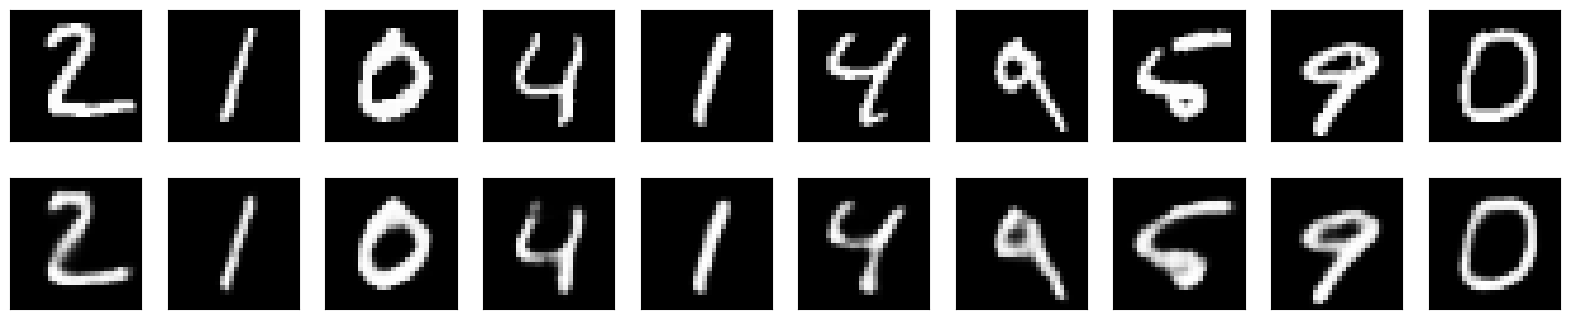

In [48]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 1ms/step


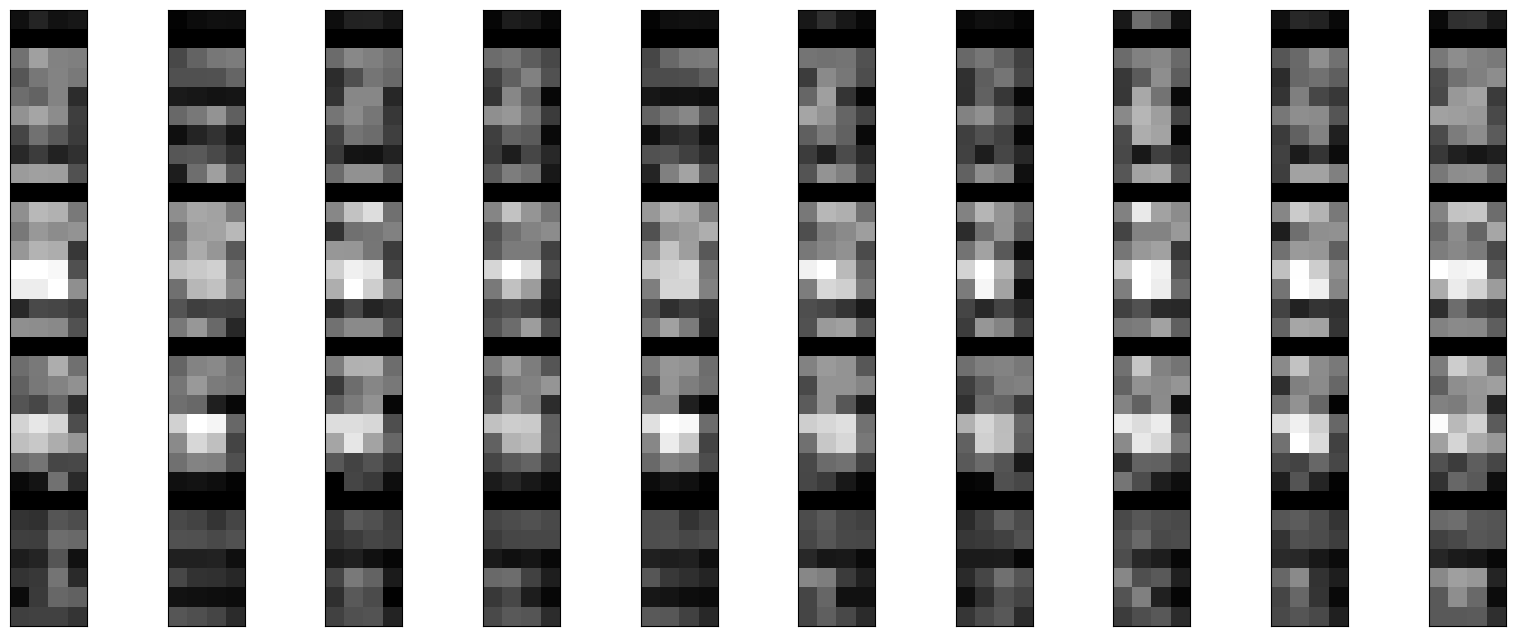

In [49]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# ---------------------
# 4 - Application to image denoising
# ---------------------

In [50]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

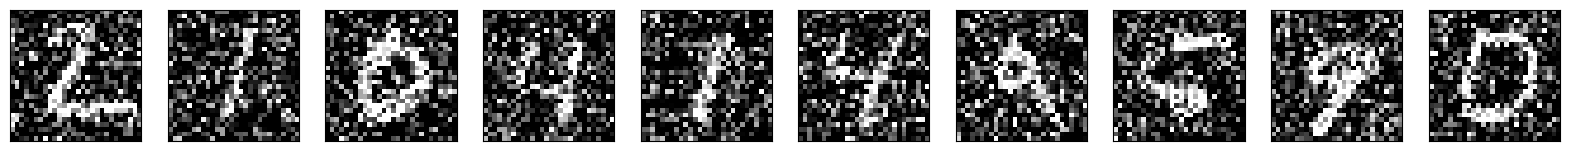

In [51]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [52]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [54]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 13s 28ms/step - loss: 0.0960 - val_loss: 0.0951
Epoch 2/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0959 - val_loss: 0.0951
Epoch 3/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0957 - val_loss: 0.0949
Epoch 4/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0956 - val_loss: 0.0949
Epoch 5/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0955 - val_loss: 0.0948
Epoch 6/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0954 - val_loss: 0.0946
Epoch 7/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0953 - val_loss: 0.0949
Epoch 8/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0953 - val_loss: 0.0946
Epoch 9/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0951 - val_loss: 0.0952
Epoch 10/100
469/469 [==============================] - 13s 27ms/step - l

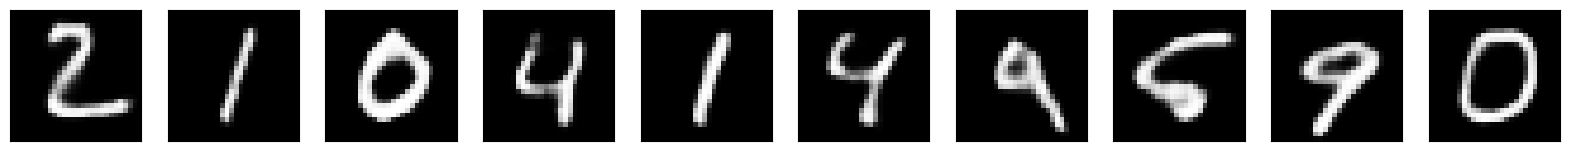

In [61]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# -----------------------
# 5 - Variational autoencoder (VAE)
# -----------------------

In [67]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [68]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [69]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [70]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 188.0148 - val_loss: 168.8074
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 166.1743 - val_loss: 163.8458
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 162.3086 - val_loss: 161.1385
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 159.7469 - val_loss: 158.7795
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 157.7067 - val_loss: 157.0922
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 156.1033 - val_loss: 155.6340
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 154.9737 - val_loss: 154.7472
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 154.1580 - val_loss: 154.0456
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 153.4978 - val_loss: 153.5186
Epoch 10/100
1875/1875 [=============

192/313 [=================>............] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


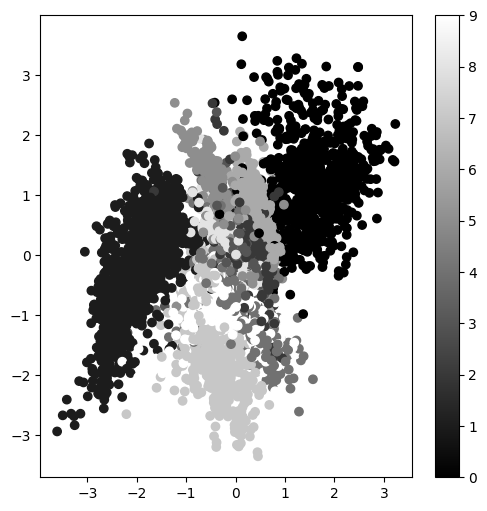

In [74]:
x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0][:, 0], x_test_encoded[0][:, 1], c=y_test)
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 18ms/step


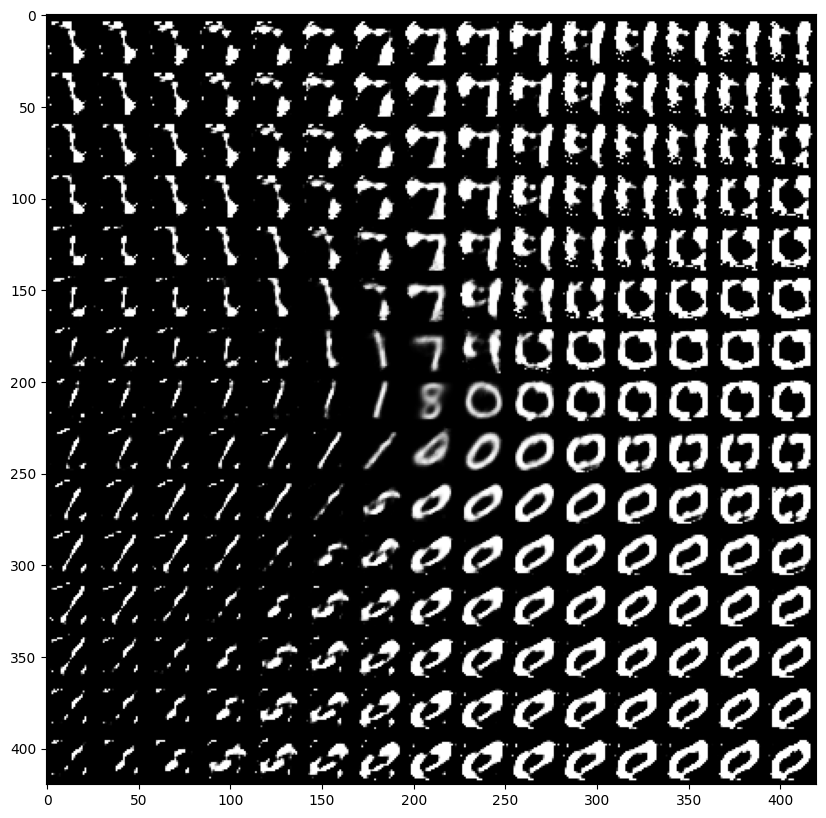

In [75]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()